In [1]:
#PART1.1
#Python Scripting for Data Retrieval

from Bio import Entrez, SeqIO

def fetch_and_save_sequence(uniprot_id, filename):
    Entrez.email = "gulnuruzun20@gmail.com"  #Set your email address for NCBI usage

    #In this script within the try block, it retrieves the protein record using the UniProt ID and converts it into a SeqRecord object in the GenBank format.
    #If an error occurs during this process, the except block comes into play and prints the error to the screen. 
    #This way, the user can see which UniProt ID is associated with the error, and the flow can continue.
    try:
        #Fetch the protein record using the UniProt ID
        #The Entrez.efetch function is used to retrieve data based on the UniProt ID.
        #db="protein": Indicates that we will search in the protein database.
        #id=uniprot_id: We will use the UniProt ID to identify and fetch the specified protein.
        #rettype="gb": Specifies that we want to receive the data in the GenBank format.
        #retmode="text": Indicates that we want to receive the data in text format.
        handle = Entrez.efetch(db="protein", id=uniprot_id, rettype="gb", retmode="text") 
        
        #The SeqIO.read function reads the data in GenBank format from the data stream named handle and converts the data into a SeqRecord object.
        record = SeqIO.read(handle, "genbank")
        
        #handle.close(): Closes the data stream named handle.
        handle.close()

        #Extract and save the amino acid sequence to a FASTA file
        with open(filename, "w") as file:
            file.write(f">Sequence\n{record.seq}\n")

        print(f"Sequence for {uniprot_id} saved to {filename}") #we will save the uniprot_id to filename.
        
    except Exception as e: #We express that we handle any error here.
        print(f"Error fetching sequence for {uniprot_id}: {e}") #Prints the details of the error to the screen.

if __name__ == "__main__": #We use this control block to check if the script is directly executed.
    #UniProt IDs of cytochrome P450 family proteins
    protein_data = {
        "P08684": "cytochrome_P450_1",
        "P10635": "cytochrome_P450_2",
        "P11712": "cytochrome_P450_3"
    }
    
    #This code block creates a loop for each UniProt ID and protein name pair in the protein_data dictionary. 
    #Subsequently, it generates a FASTA file name for each UniProt ID and calls the fetch_and_save_sequence 
    #function to retrieve the corresponding protein by the UniProt ID and saves this protein to the created FASTA file.
    for uniprot_id, protein_name in protein_data.items():
        filename = f"{uniprot_id}_{protein_name}_sequence.fasta"
        fetch_and_save_sequence(uniprot_id, filename)




Sequence for P08684 saved to P08684_cytochrome_P450_1_sequence.fasta
Sequence for P10635 saved to P10635_cytochrome_P450_2_sequence.fasta
Sequence for P11712 saved to P11712_cytochrome_P450_3_sequence.fasta


In [2]:
#PART1.2
#Sequence Pre-processing

from Bio import SeqIO

def preprocess_sequences(fasta_filename):
    try:
        #Parse the FASTA file using Biopython's SeqIO module
        records = list(SeqIO.parse(fasta_filename, "fasta"))

        if not records:
            print(f"No sequences found in {fasta_filename}")
            return

        for record in records:
            #Check for non-standard amino acids
            non_standard_aa = set(record.seq) - set("ACDEFGHIKLMNPQRSTVWY")
            if non_standard_aa:
                print(f"Warning: Non-standard amino acids found in {record.id}: {non_standard_aa}")

            #Check for unusually short sequences
            if len(record.seq) < 10:
                print(f"Warning: Sequence in {record.id} is unusually short (length: {len(record.seq)})")

        print(f"Sequence pre-processing for {fasta_filename} completed.")

    except Exception as e:
        print(f"Error during sequence pre-processing: {e}")

if __name__ == "__main__":
    #Specify the FASTA files to preprocess
    fasta_files = [
        "P08684_cytochrome_P450_1_sequence.fasta",
        "P10635_cytochrome_P450_2_sequence.fasta",
        "P11712_cytochrome_P450_3_sequence.fasta"
    ]

    #Apply sequence pre-processing for each FASTA file
    for fasta_file in fasta_files:
        preprocess_sequences(fasta_file)





Sequence pre-processing for P08684_cytochrome_P450_1_sequence.fasta completed.
Sequence pre-processing for P10635_cytochrome_P450_2_sequence.fasta completed.
Sequence pre-processing for P11712_cytochrome_P450_3_sequence.fasta completed.


In [7]:
#PART2 Pairwise Sequence Alignment
#PART2.1 Alignment Scripting

from Bio import SeqIO
from Bio import pairwise2

#Read FASTA files
fasta_files = [
    "P08684_cytochrome_P450_1_sequence.fasta",
    "P10635_cytochrome_P450_2_sequence.fasta",
    "P11712_cytochrome_P450_3_sequence.fasta"
]

#Perform sequence alignment
for i in range(len(fasta_files)):
    for j in range(i + 1, len(fasta_files)):
        with open(fasta_files[i], "r") as handle1, open(fasta_files[j], "r") as handle2:
            #Read sequences from FASTA files
            sequences = [list(SeqIO.parse(handle1, "fasta"))[0].seq, list(SeqIO.parse(handle2, "fasta"))[0].seq]
            
            #Perform global pairwise sequence alignment using the xx scoring scheme
            alignments = pairwise2.align.globalxx(sequences[0], sequences[1])
            alignment = alignments[0]

            #Define the chunk size for visualization
            chunk_size = 100  # or any other value

            #Divide each sequence into chunks based on the specified chunk size
            a, b = alignment[:2]
            chunked_a = [a[i:i + chunk_size] for i in range(0, len(a), chunk_size)]
            chunked_b = [b[i:i + chunk_size] for i in range(0, len(b), chunk_size)]

            #Calculate matches and mismatches for each chunk
            matches = [''.join(['|' if chunked_a[k][l] == chunked_b[k][l] else '.' for l in range(len(chunked_a[k]))]) for k in range(len(chunked_a))]

            #Print the alignment
            print(f"Alignment between {fasta_files[i]} and {fasta_files[j]}:")
            for k, (chunk_a, chunk_b, match) in enumerate(zip(chunked_a, chunked_b, matches)):
                start_index = k * chunk_size + 1
                end_index = start_index + chunk_size - 1
                txt = f'{start_index} to {end_index}'
                print(txt)
                print(chunk_a)
                print(match)
                print(chunk_b)
                print()

            #Print the alignment score
            score = alignment[2]
            print(f"Alignment Score: {score}")

            print("\n" + "-"*40 + "\n")



Alignment between P08684_cytochrome_P450_1_sequence.fasta and P10635_cytochrome_P450_2_sequence.fasta:
1 to 100
MALIPD-LAMETWL-L--LAVSL-VL---LYLYGTHSHGLFKK--LGI-----------P-GPT-PLPF-LGNILSY-HKG--F-----CMFDMECHKKY
|......|..|....|..|||...|....|.|.......|.....|.............|.||..|||..|||.|...|....|.....|.||.......
M-----GL--E---ALVPLAV--IV-AIFL-L-------L---VDL--MHRRQRWAARYPPGP-LPLP-GLGN-L--LH--VDFQNTPYC-FD-------

101 to 200
------GK-VWGFYDGQ--QPVLAI-TDPDMIKTV--L-----VK-ECYS--VFTNR-------RPFGPV------GFMK---S-----AISI----AED
......|..|..|......|..||..|.|.....|..|.....|..|.....|.|.........||..||......||.....|.....|.......|..
QLRRRFG-DV--F----SLQ--LA-WT-P-----VVVLNGLAAV-RE---ALV-T--HGEDTADRP--PVPITQILGF--GPRSQGVFLA---RYGPA--

201 to 300
EEWKRL--R--SLL-SPTFTS----GKL-K---EMVPIIAQYGD-V------LVR-----NL---R--REAETGKPVT--LK-DVFG-AY-SMD-VIT-S
..|.|...|..|...|...|.....|.|.|...|......|....|......|.......|....|..|......|....|..|....|..|...||..|
--W-R-EQRRFS--VS---T-LRNLG-LGKKSLE------Q---WVTEEAACL--C

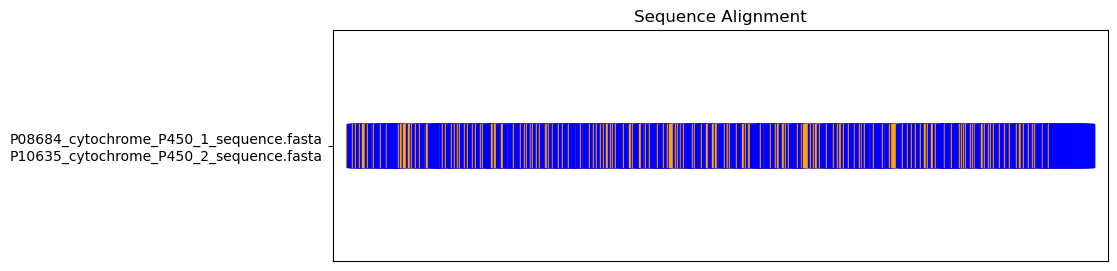

Alignment between P08684_cytochrome_P450_1_sequence.fasta and P10635_cytochrome_P450_2_sequence.fasta:
Alignment Score: 201.0
Sequence Identity: 25.16%
Sequence Similarity: 50.31%

----------------------------------------



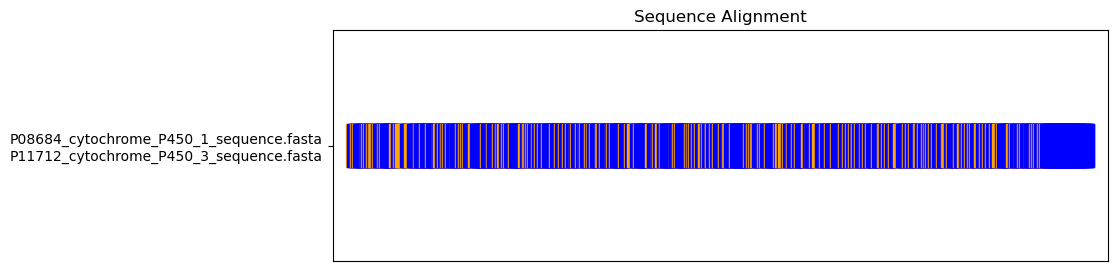

Alignment between P08684_cytochrome_P450_1_sequence.fasta and P11712_cytochrome_P450_3_sequence.fasta:
Alignment Score: 210.0
Sequence Identity: 26.82%
Sequence Similarity: 53.64%

----------------------------------------



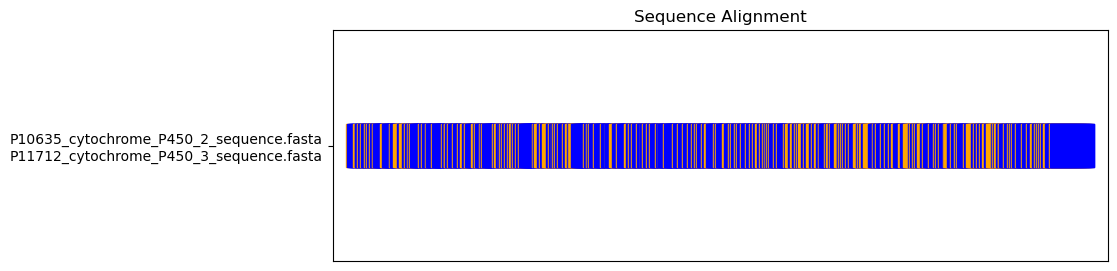

Alignment between P10635_cytochrome_P450_2_sequence.fasta and P11712_cytochrome_P450_3_sequence.fasta:
Alignment Score: 242.0
Sequence Identity: 32.48%
Sequence Similarity: 64.97%

----------------------------------------



In [18]:
#Part2.2 Result Complication

from Bio import SeqIO
from Bio import pairwise2
import matplotlib.pyplot as plt

def perform_alignment(seq1, seq2):
    #Perform global pairwise sequence alignment using the xx scoring scheme
    alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
    return alignments[0]

def calculate_identity_similarity(alignment):
    #Calculate the number of matching symbols between aligned sequences
    matches = sum([1 for symbol1, symbol2 in zip(alignment.seqA, alignment.seqB) if symbol1 == symbol2])
    length = len(alignment.seqA)

    #Calculate identity and similarity percentages
    identity_percentage = (matches / length) * 100
    similarity_percentage = ((matches + alignment.score) / length) * 100
    return identity_percentage, similarity_percentage

def visualize_alignment(file1, file2, alignment):
    #Visualize sequence alignment using a scatter plot with different colors for matches and mismatches
    fig, ax = plt.subplots(figsize=(10, 3))
    colors = ['orange' if symbol1 == symbol2 else 'blue' for symbol1, symbol2 in zip(alignment.seqA, alignment.seqB)]
    ax.scatter(range(len(alignment.seqA)), [1] * len(alignment.seqA), c=colors, marker='s', s=1000)

    #Set plot properties
    ax.set_title('Sequence Alignment')
    ax.set_xticks([])
    ax.set_yticks([1])
    ax.set_yticklabels([f'{file1}\n{file2}'])
    ax.set_ylim(0.9, 1.1)

    plt.show()

def generate_report(alignment, seq1, seq2):
    #Generate a detailed alignment report including score, identity, and similarity percentages
    identity_percentage, similarity_percentage = calculate_identity_similarity(alignment)
    report = f"Alignment Score: {alignment.score}\n"
    report += f"Sequence Identity: {identity_percentage:.2f}%\nSequence Similarity: {similarity_percentage:.2f}%"
    return report

if __name__ == "__main__":
    #List of FASTA files containing sequences to be aligned
    fasta_files = [
        "P08684_cytochrome_P450_1_sequence.fasta",
        "P10635_cytochrome_P450_2_sequence.fasta",
        "P11712_cytochrome_P450_3_sequence.fasta"
    ]

    #Iterate through pairs of FASTA files
    for i in range(len(fasta_files)):
        for j in range(i + 1, len(fasta_files)):
            with open(fasta_files[i], "r") as handle1, open(fasta_files[j], "r") as handle2:
                # Read sequences from FASTA files
                sequences = [list(SeqIO.parse(handle1, "fasta"))[0].seq, list(SeqIO.parse(handle2, "fasta"))[0].seq]

                #Perform global pairwise sequence alignment
                alignment = perform_alignment(sequences[0], sequences[1])

                #Visualize the alignment using file names and orange/blue colors
                visualize_alignment(fasta_files[i], fasta_files[j], alignment)

                #Generate and print the detailed report
                report = generate_report(alignment, str(sequences[0]), str(sequences[1]))
                print(f"Alignment between {fasta_files[i]} and {fasta_files[j]}:")
                print(report)
                print("\n" + "-" * 40 + "\n")





